## Introduction

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다.
mnist = keras.datasets.mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

In [4]:
for i in x_train_norm.shape:
    print(i)
type(x_train_norm.shape)

60000
28
28


tuple

In [5]:
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])
print(x_train_reshaped.shape, x_test_reshaped.shape)

(60000, 784) (10000, 784)


### Example

In [6]:
# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8554 - accuracy: 0.8030

## Code

In [7]:
X = x_train_reshaped[:5]
X.shape

(5, 784)

In [8]:
weight_init_std = 0.1
input_size = 784
hidden_size = 50

In [9]:
np.random.randn(input_size, hidden_size)

array([[-0.24606554, -0.2563183 ,  2.21712469, ...,  0.75998427,
        -0.34498808,  1.28386875],
       [-2.74799747, -0.10502114, -0.38490354, ...,  2.91671025,
        -0.66395302,  0.03907077],
       [-0.70968477,  1.79813093, -0.94969364, ...,  0.67056123,
        -2.85334183, -0.68218115],
       ...,
       [-0.395175  , -1.18040641,  1.70800599, ...,  0.82702546,
         0.80488484, -0.43552839],
       [-1.05880005, -0.33330778,  0.36571647, ..., -1.30979503,
         0.37290834,  1.52182394],
       [-0.12855498, -1.73029407, -1.31000622, ..., -0.08369672,
        -1.20601718,  1.021272  ]])

In [10]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
print(W1.shape)
W1

(784, 50)


array([[ 0.03080767, -0.06812043, -0.02750705, ...,  0.03738047,
        -0.01854911, -0.15428837],
       [ 0.05644895, -0.18132351, -0.07427892, ..., -0.00120659,
        -0.1095056 , -0.08146023],
       [-0.19337916,  0.01860721, -0.10540259, ...,  0.06869158,
         0.08895932, -0.00557007],
       ...,
       [ 0.24637442, -0.02016569, -0.00452712, ..., -0.19463339,
        -0.09598112,  0.03323043],
       [ 0.07269558, -0.23299712,  0.00277993, ..., -0.08234261,
        -0.08534557,  0.07438255],
       [-0.00537351,  0.17905149,  0.16971463, ...,  0.0779253 ,
        -0.14599619, -0.04504463]])

In [11]:
b1 = np.zeros(hidden_size)
print(b1.shape)
b1

(50,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
a1 = np.dot(X,W1) + b1
print(a1.shape)
a1

(5, 50)


array([[-8.72269720e-01,  1.57373396e+00, -1.67599725e-01,
         2.08777141e-01,  5.10304343e-01, -7.35593311e-02,
         2.93265430e-01,  5.80362838e-01, -1.01631702e-01,
        -3.50931511e-02, -8.30792788e-01, -2.31871463e-01,
        -9.65385667e-01, -9.84032287e-04, -2.98298099e+00,
         1.72509402e+00, -1.30268474e+00,  3.54674998e-01,
        -1.93488310e+00,  2.13984177e-01,  8.87809852e-01,
         1.57196248e+00,  1.12953123e+00,  8.33900705e-01,
         1.30466458e+00, -3.34180737e-02,  5.37937794e-01,
         8.10393483e-01,  1.65497496e+00,  2.63729477e-01,
        -2.77386392e-01,  1.47471416e+00,  1.98952482e+00,
        -1.27221844e+00,  1.45037636e+00,  9.58155793e-01,
        -3.94021773e-01, -1.34195592e+00,  7.25029083e-01,
         8.39159238e-01,  3.61280101e-01,  1.00717143e+00,
        -6.61450522e-02, -1.19225541e+00, -8.11082570e-01,
        -1.86768970e-01, -5.64078620e-02,  9.48093994e-01,
         8.16740829e-01, -5.63911150e-01],
       [-1.08

In [13]:
a1[0]

array([-8.72269720e-01,  1.57373396e+00, -1.67599725e-01,  2.08777141e-01,
        5.10304343e-01, -7.35593311e-02,  2.93265430e-01,  5.80362838e-01,
       -1.01631702e-01, -3.50931511e-02, -8.30792788e-01, -2.31871463e-01,
       -9.65385667e-01, -9.84032287e-04, -2.98298099e+00,  1.72509402e+00,
       -1.30268474e+00,  3.54674998e-01, -1.93488310e+00,  2.13984177e-01,
        8.87809852e-01,  1.57196248e+00,  1.12953123e+00,  8.33900705e-01,
        1.30466458e+00, -3.34180737e-02,  5.37937794e-01,  8.10393483e-01,
        1.65497496e+00,  2.63729477e-01, -2.77386392e-01,  1.47471416e+00,
        1.98952482e+00, -1.27221844e+00,  1.45037636e+00,  9.58155793e-01,
       -3.94021773e-01, -1.34195592e+00,  7.25029083e-01,  8.39159238e-01,
        3.61280101e-01,  1.00717143e+00, -6.61450522e-02, -1.19225541e+00,
       -8.11082570e-01, -1.86768970e-01, -5.64078620e-02,  9.48093994e-01,
        8.16740829e-01, -5.63911150e-01])

## Activation functions & Loss functions
### Examples
```
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))
```
## Code

In [14]:
import matplotlib.pyplot as plt

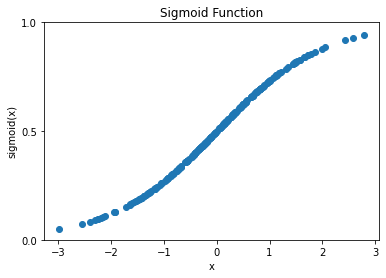

In [15]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

z1 = sigmoid(a1)
plt.scatter(a1, z1)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.yticks([0,0.5,1.0])
plt.title('Sigmoid Function')
plt.show()

a1의 분포가 좁아서 더 굴곡진 sigmoid 형태가 나오지 않은 것 같다

In [16]:
print(np.max(a1), np.min(a1))

2.7834245970870155 -2.982980992614809


x의 범위: -14.700117816937649 ~ 13.094487755874301


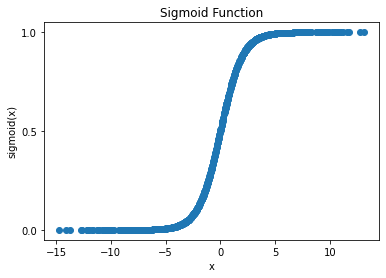

In [17]:
x = np.random.randn(1000) * 5
print("x의 범위:", np.min(x), '~', np.max(x))
x1 = sigmoid(x)
plt.scatter(x, x1)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.yticks([0,0.5,1.0])
plt.title('Sigmoid Function')
plt.show()

### Explanation

- vanishing gradinet 현상 발생
- exp함수 사용 시 비용이 큼

### Code

In [18]:
def tanh(x):
    return (np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x))

x의 범위: -15.138264552016889 ~ 15.18159653173852


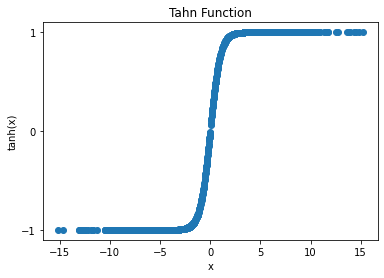

In [19]:
x = np.random.randn(1000) * 5
print("x의 범위:", np.min(x), '~', np.max(x))
x1 = tanh(x)
plt.scatter(x, x1)
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.yticks([-1.0,0,1.0])
plt.title('Tahn Function')
plt.show()

In [20]:
# def relu(x):
#     return x if x > 0 else 0

def relu(x):
    return np.maximum(0,x)

print(relu(np.array([1,2,3])))

[1 2 3]


x의 범위: -14.377648834082269 ~ 13.570486623866035


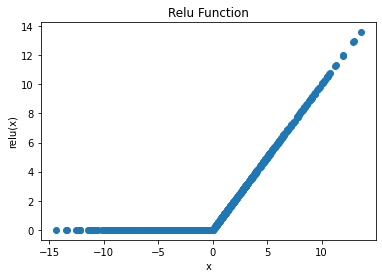

In [21]:
x = np.random.randn(1000) * 5
print("x의 범위:", np.min(x), '~', np.max(x))
x1 = relu(x)
plt.scatter(x, x1)
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.title('Relu Function')
plt.show()

In [22]:
def affine_layer_forward(X,W,b):
    y = np.dot(X,W) + b
    cache = (X,W,b)
    return y,cache

In [23]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다.

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[ 0.27218258 -0.09855843 -0.03327967 -0.12746874 -0.20889467 -0.03820511
  0.0645714  -1.28778164 -0.13136062 -0.14311118]


In [24]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [37]:
y_hat = softmax(a2)
y_hat

array([[0.14706745, 0.10150929, 0.10835676, 0.09861664, 0.09090492,
        0.10782436, 0.11949567, 0.03090528, 0.09823358, 0.09708604],
       [0.12950046, 0.10880699, 0.1043789 , 0.09630729, 0.10135597,
        0.1251784 , 0.11847428, 0.04159526, 0.08914769, 0.08525475],
       [0.20027755, 0.10229084, 0.08727486, 0.06931678, 0.12078751,
        0.10043465, 0.09490125, 0.04752229, 0.08635608, 0.0908382 ],
       [0.16381494, 0.11612319, 0.08691664, 0.07686446, 0.08355023,
        0.09804773, 0.12933055, 0.04039401, 0.09947761, 0.10548063],
       [0.1722129 , 0.08420788, 0.09250865, 0.07690569, 0.11654487,
        0.09104367, 0.10670602, 0.03594446, 0.1318611 , 0.09206475]])

In [38]:
y_hat.shape

(5, 10)

In [ ]:
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

In [26]:
sum(y_hat[0])

1.0

In [27]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [28]:
Y_digit

array([5, 0, 4, 1, 9], dtype=uint8)

In [29]:
print(y_hat[0])
print(t[0])

[0.14706745 0.10150929 0.10835676 0.09861664 0.09090492 0.10782436
 0.11949567 0.03090528 0.09823358 0.09708604]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [30]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.1846823263798507

In [36]:
batch_num = y_hat.shape[0]
batch_num

5

In [39]:
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.02941349,  0.02030186,  0.02167135,  0.01972333,  0.01818098,
        -0.17843513,  0.02389913,  0.00618106,  0.01964672,  0.01941721],
       [-0.17409991,  0.0217614 ,  0.02087578,  0.01926146,  0.02027119,
         0.02503568,  0.02369486,  0.00831905,  0.01782954,  0.01705095],
       [ 0.04005551,  0.02045817,  0.01745497,  0.01386336, -0.1758425 ,
         0.02008693,  0.01898025,  0.00950446,  0.01727122,  0.01816764],
       [ 0.03276299, -0.17677536,  0.01738333,  0.01537289,  0.01671005,
         0.01960955,  0.02586611,  0.0080788 ,  0.01989552,  0.02109613],
       [ 0.03444258,  0.01684158,  0.01850173,  0.01538114,  0.02330897,
         0.01820873,  0.0213412 ,  0.00718889,  0.02637222, -0.18158705]])

In [41]:
dW2 = np.dot(z1.T, dy)
dW2

array([[-0.03580457, -0.03113941,  0.04127191,  0.0358093 , -0.07754316,
        -0.01566256,  0.04856268,  0.01763453,  0.04245373, -0.02558244],
       [-0.07982774, -0.07770858,  0.05899761,  0.05221634, -0.01267469,
        -0.06313587,  0.0706937 ,  0.02359887,  0.06027114, -0.03243079],
       [-0.03026697, -0.07642724,  0.05501422,  0.04826139,  0.00463952,
        -0.04859293,  0.06624021,  0.02190768,  0.0598044 , -0.10058027],
       [-0.04863133, -0.05036869,  0.05591247,  0.04942343, -0.00887205,
        -0.09598368,  0.06616193,  0.02173435,  0.05749559, -0.04687201],
       [-0.03027694, -0.0814544 ,  0.04259413,  0.0372061 , -0.06832834,
        -0.0203602 ,  0.05166037,  0.01829948,  0.04323108,  0.0074287 ],
       [-0.05902056, -0.06428535,  0.05627878,  0.04970044,  0.0043033 ,
        -0.06685195,  0.06721399,  0.02213778,  0.05905004, -0.06852646],
       [ 0.0153865 , -0.07921164,  0.05648582,  0.04960559, -0.02639016,
        -0.11883812,  0.06758319,  0.02209078

In [42]:
db2 = np.sum(dy, axis=0)
db2

array([-0.03742534, -0.09741236,  0.09588716,  0.08360217, -0.0973713 ,
       -0.09549424,  0.11378155,  0.03927226,  0.10101521, -0.10585513])

In [43]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [44]:
dz1 = np.dot(dy,W2.T)
da1 = sigmoid_grad(a1)*dz1
dW1 = np.dot(X.T,da1)
db1 = np.sum(dz1,axis=0)

In [ ]:
learning_rate = 0.1

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

# 가정: mnist data

In [32]:
np.zeros(50).reshape(5,10)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
mnist_data = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [34]:
flatten = x_train.reshape(x_train.shape[0]*x_train.shape[1]*x_train.shape[2])
flatten.shape

(47040000,)

# 명확히 설명할 수 있어야 하는것.
1. Activation을 왜 해야할까?
2.